## IMAGE SELECTION

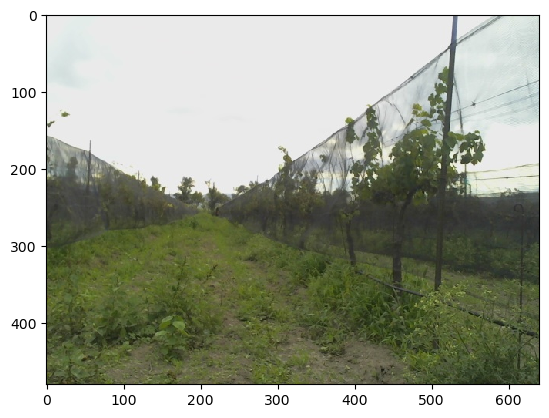

In [18]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math

img = cv2.imread("test_images/20221002-223527.jpg")
#img = cv2.imread("test_images/20221002-223338.jpg")
#cv2.imshow("original",img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

original = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Convertion to rgb in order to maintain the same colors in cv2 and pyplot
plt.imshow(original)
plt.show()
image=original


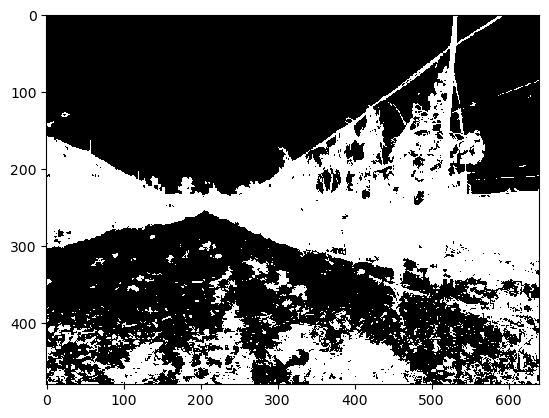

In [19]:

hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

min_color = np.array([0,0,0])
max_color = np.array([180,99,181])

colorMask = cv2.inRange(hsv, min_color, max_color)

image = cv2.cvtColor(colorMask, cv2.COLOR_BGR2RGB) #Convertion to rgb in order to maintain the same colors in cv2 and pyplot
plt.imshow(image)
plt.show()

(480, 640, 3)


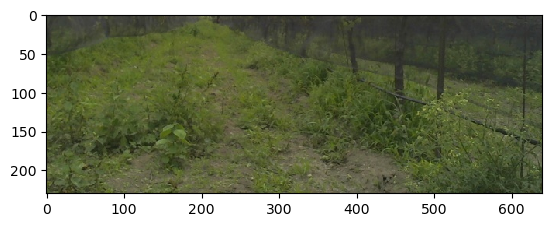

In [20]:
print(image.shape)
recortar = original[250:480,0:640]

plt.imshow(recortar)

image=recortar

## Gray sacale transformation

(230, 640)

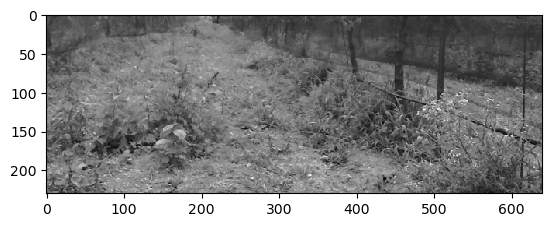

In [21]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray,cmap='gray')
gray.shape

## Otsu's Binarization

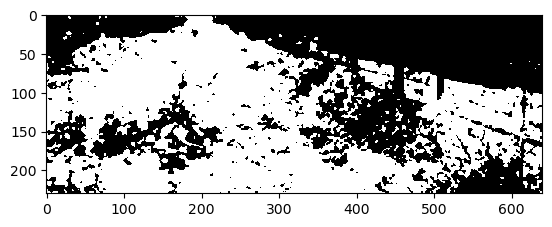

In [22]:
blur = cv2.GaussianBlur(gray,(5,5),0)
ret,otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(otsu,cmap='gray')


## MORPHOLOGICAL OPERATIONS

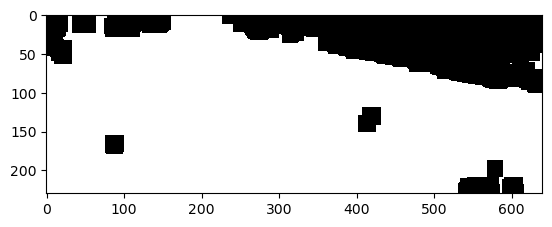

In [23]:
#Erosion
kernel = np.array([[1,1,1],[1,1,1],[1,1,1]])
erosion = cv2.morphologyEx(otsu,cv2.MORPH_CLOSE,kernel,iterations=10)
#erosion = ~erosion

plt.imshow(erosion,cmap='gray')
plt.show()

## EDGE DETECTION

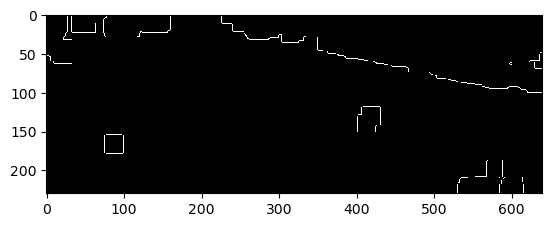

In [24]:
edges = cv2.Canny(erosion,50,150,apertureSize = 3)

plt.imshow(edges,cmap='gray')
plt.show()

## LINE DETECTION

NO LINES DETECTED


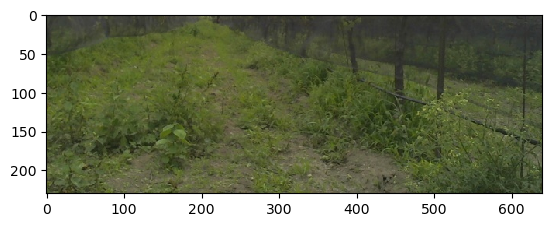

In [25]:
lines = cv2.HoughLines(edges,1,np.pi/180,200) 
if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv2.line(image, pt1, pt2, (0,255,255), 3)
        print('line',i)
else:
    print("NO LINES DETECTED")
#cv2.imshow('houghlines',img)

plt.imshow(image)
plt.show()